# Weather Tweet Sentiment Analysis

The dataset is downloaded from https://data.world/crowdflower/weather-sentiment

Data contains tweets. I have selected only three columns tweet, sentiment and confidence value.

In [160]:
import numpy as np
import pandas as pd

In [161]:
tweets_raw = pd.read_csv('weather-agg-DFE.csv', header=0)

In [162]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
_unit_id                                                                          1000 non-null int64
_canary                                                                           0 non-null float64
_unit_state                                                                       1000 non-null object
_trusted_judgments                                                                1000 non-null int64
_last_judgment_at                                                                 1000 non-null object
what_emotion_does_the_author_express_specifically_about_the_weather               1000 non-null object
what_emotion_does_the_author_express_specifically_about_the_weather:confidence    1000 non-null float64
gold_answer                                                                       0 non-null float64
tweet_id                                                                   

In [163]:
tweets = pd.DataFrame(tweets_raw[['what_emotion_does_the_author_express_specifically_about_the_weather','what_emotion_does_the_author_express_specifically_about_the_weather:confidence',
                          'tweet_text']])

In [164]:
tweets.head()

,what_emotion_does_the_author_express_specifically_about_the_weather,what_emotion_does_the_author_express_specifically_about_the_weather:confidence,tweet_text
0,Positive,0.8439,Grilling kabobs on the grill last night was am...
1,Negative,0.6963,The slowest day ever !! And the weather makes ...
2,Neutral / author is just sharing information,0.8802,Fire Weather Watch issued May 17 at 4:21PM CDT...
3,Positive,0.6897,Im going to lunch early today. The weather i...
4,Neutral / author is just sharing information,0.6153,Weekend Weather Causes Delays In I-270 Bridge ...


In [165]:
tweets.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather':'sentiment'}, inplace=True)

In [166]:
tweets.rename(columns={'what_emotion_does_the_author_express_specifically_about_the_weather:confidence':'confidence'}, inplace=True)

In [167]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
sentiment     1000 non-null object
confidence    1000 non-null float64
tweet_text    1000 non-null object
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [168]:
tweets.describe()

,confidence
count,1000.000000
mean,0.638907
std,0.170178
min,0.270500
25%,0.496725
50%,0.648850
75%,0.764800
max,1.000000


In [169]:
tweets['sentiment'].describe()

count         1000
unique           5
top       Negative
freq           271
Name: sentiment, dtype: object

In [170]:
tweets.groupby('sentiment').describe()

confidence                      \
                                                  count      mean       std   
sentiment                                                                     
I can't tell                                        2.0  0.430200  0.151887   
Negative                                          271.0  0.626798  0.165867   
Neutral / author is just sharing information      261.0  0.648633  0.176832   
Positive                                          231.0  0.673429  0.190928   
Tweet not related to weather condition            235.0  0.609911  0.136210   

                                                                               \
                                                 min      25%     50%     75%   
sentiment                                                                       
I can't tell                                  0.3228  0.37650  0.4302  0.4839   
Negative                                      0.3206  0.48950  0.6212  0.7467   
Neutral / author is just sharing information  0.2714  0.49650  0.6646  0.8092   
Positive                                      0.2845  0.50485  0.6921  0.8341   
Tweet not related to weather condition        0.2705  0.50515  0.6275  0.7201   

                                                      
                                                 max  
sentiment                                             
I can't tell                                  0.5376  
Negative                                      1.0000  
Neutral / author is just sharing information  0.9642  
Positive                                      1.0000  
Tweet not related to weather condition        0.9384

** Explore data **

In [171]:
# create a tweet text length column
tweets['text_len'] = tweets['tweet_text'].apply(len)

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

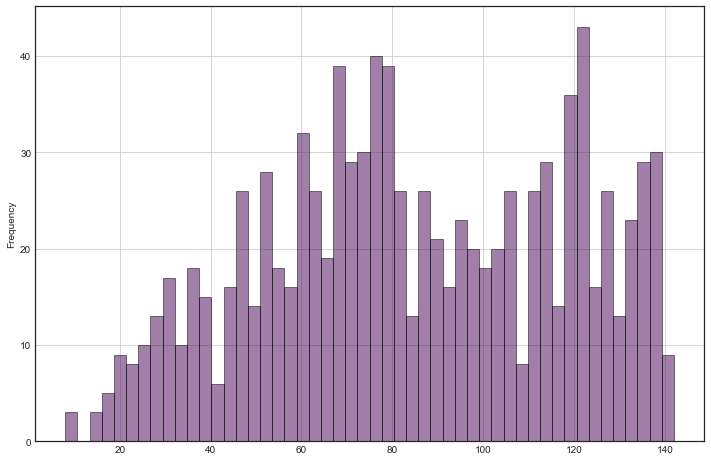

In [173]:
plt.figure(figsize=(12,8),edgecolor='b')
tweets['text_len'].plot(bins=50, kind='hist',grid=True, colormap='viridis', alpha=0.5,edgecolor='k' )

In [174]:
tweets['text_len'].describe()

count    1000.000000
mean       84.509000
std        33.040727
min         8.000000
25%        60.000000
50%        82.000000
75%       115.000000
max       142.000000
Name: text_len, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2493e2e8>,
      dtype=object)

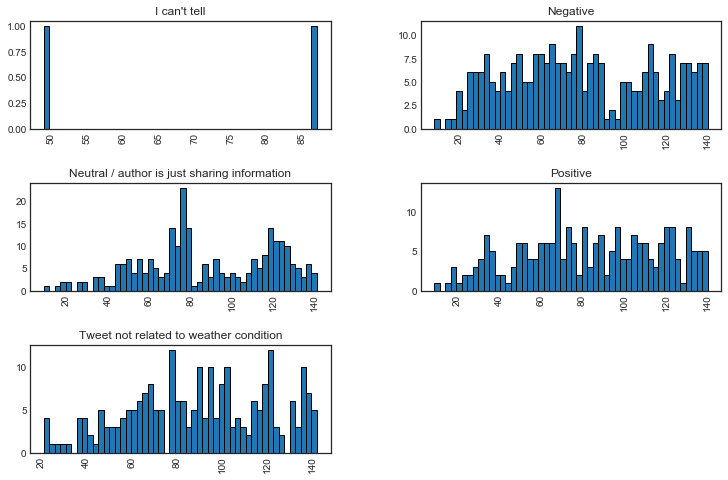

In [175]:
tweets.hist(column='text_len', by='sentiment', figsize=(12,8), grid=True,bins=50,edgecolor='k')

** Understand common words used in tweets **

In [176]:
all_words = ' '.join([text for text in tweets['tweet_text']])

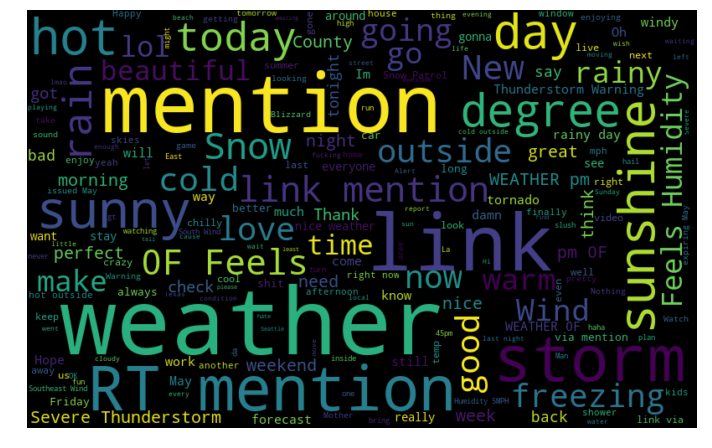

In [177]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

** Words do not belong to the topic 'weather' **

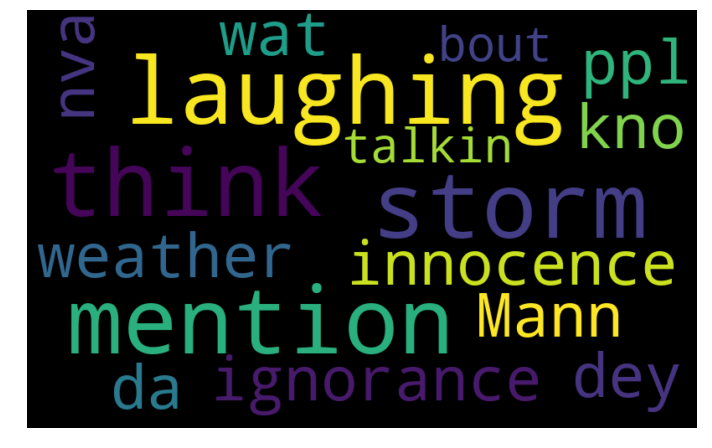

In [178]:
other_words =' '.join([text for text in tweets['tweet_text'][tweets['sentiment'] == 'I can\'t tell']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(other_words)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

** Text Preprocessing **

In [179]:
#sample
print(tweets['tweet_text'][4])

Weekend Weather Causes Delays In I-270 Bridge Work  {link}


In [180]:
import re # regular expression

In [181]:
# simple function to remove handles
def remove_link(tweet_text,pattern):
    r = re.findall(pattern, tweet_text)
    input_txt = tweet_text
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [182]:
# remove twitter handles (@user, {link})
tweets['tweet_text'] = np.vectorize(remove_link)(tweets['tweet_text'], "@[\w]*")
tweets['tweet_text'] = np.vectorize(remove_link)(tweets['tweet_text'], "{link}")

In [183]:
# remove special characters, numbers, punctuations
tweets['tweet_text'] = tweets['tweet_text'].str.replace("[^a-zA-Z#]", " ")

In [184]:
print(tweets['tweet_text'][4])

Weekend Weather Causes Delays In I     Bridge Work  


** Tokenization**

In [152]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santhilataKV/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
def text_process(tweet):
    '''
    remove punctuation
    remove all stopwords
    return list of cleaned tweets
    '''
    nopunc = [char for char in tweet if char not in string.punctuation] # remove punctuation
    nopunc = ''.join(nopunc) # join back to tweet string
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [154]:
# is this working?
tokenized_tweets = tweets['tweet_text'].apply(text_process) 
tokenized_tweets.head(5)

0    [Grilling, kabobs, grill, last, night, amazing...
1    [slowest, day, ever, weather, makes, even, worse]
2    [Fire, Weather, Watch, issued, May, PM, CDT, e...
3    [Im, going, lunch, early, today, weather, nice...
4     [Weekend, Weather, Causes, Delays, Bridge, Work]
Name: tweet_text, dtype: object

In [155]:
tweets['tweet_text'] = tweets['tweet_text'].apply(text_process) 
tweets['tweet_text'][4]

['Weekend', 'Weather', 'Causes', 'Delays', 'Bridge', 'Work']

** Stemming **

In [120]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [121]:
tweets['tweet_text']  = tweets['tweet_text'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tweets['tweet_text'].head(5)

0    [grill, kabob, grill, last, night, amaz, glad,...
1      [slowest, day, ever, weather, make, even, wors]
2    [fire, weather, watch, issu, may, PM, cdt, exp...
3    [Im, go, lunch, earli, today, weather, nice, o...
4         [weekend, weather, caus, delay, bridg, work]
Name: tweet_text, dtype: object

** Vectorization **

Count how many times does a word ocuur in each message (term frequency)

weigh the counts, so that frequent tokens get lower weight (IDF - inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

In [197]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(tweets['tweet_text'])
print(len(bow_transformer.vocabulary_))

3683


Example,

In [198]:
sample_tweet = tweets['tweet_text'][4]
print(sample_tweet)
sample_bow = bow_transformer.transform([sample_tweet])
print(sample_bow)
print(sample_bow.shape)
#print(bow_transformer.get_feature_names()[166])
#print(bow_transformer.get_feature_names()[1510])

Weekend Weather Causes Delays In I     Bridge Work  
  (0, 166)	1
  (0, 221)	1
  (0, 357)	1
  (0, 1471)	1
  (0, 1481)	1
  (0, 1510)	1
(1, 3683)


In [199]:
print(bow_transformer.get_feature_names()[1481])
print(bow_transformer.get_feature_names()[1471])

Weekend
Weather


In [200]:
tweets_bow = bow_transformer.transform(tweets['tweet_text'])

In [201]:
print('Shape of the sparse matrix: ',tweets_bow.shape)
print('Number of non-zero occurences: ',tweets_bow.nnz)

Shape of the sparse matrix:  (1000, 3683)
Number of non-zero occurences:  8310


In [202]:
sparsity = (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweets_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.2256312788487646


** Normalization with TF-IDF **

In [203]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(tweets_bow)

In [204]:
# example
tfidf_sampleTweet = tfidf_transformer.transform(sample_bow)
print(tfidf_sampleTweet)

  (0, 1510)	0.4329670682155001
  (0, 1481)	0.4329670682155001
  (0, 1471)	0.2503948665695293
  (0, 357)	0.4329670682155001
  (0, 221)	0.4329670682155001
  (0, 166)	0.4329670682155001


In [205]:
tweets_tfidf = tfidf_transformer.transform(tweets_bow)
print(tweets_tfidf.shape)

(1000, 3683)


** Train model using Naive Bayes classification **

In [206]:
from sklearn.naive_bayes import MultinomialNB
weather_sentiment_model = MultinomialNB().fit(tweets_tfidf, tweets['sentiment'])

In [210]:
#example,
print('is this prediction correct?', weather_sentiment_model.predict(tfidf_sampleTweet))

is this prediction correct? ['Neutral / author is just sharing information']


In [211]:
print('expected',tweets['sentiment'][4])

expected Neutral / author is just sharing information


** Model Evaluation **

In [212]:
all_predictions = weather_sentiment_model.predict(tweets_tfidf)
#print(all_predictions)

In [213]:
from sklearn.metrics import classification_report
print(classification_report(tweets['sentiment'],all_predictions))

                                              precision    recall  f1-score   support

                                I can't tell       0.00      0.00      0.00         2
                                    Negative       0.90      0.99      0.94       271
Neutral / author is just sharing information       1.00      0.93      0.96       261
                                    Positive       0.94      0.98      0.96       231
      Tweet not related to weather condition       0.99      0.92      0.96       235

                                 avg / total       0.96      0.95      0.95      1000



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


** Test - Train - Split **

In [225]:
from sklearn.model_selection import train_test_split

In [234]:
tweet_train, tweet_test, sentiment_train, sentiment_test = train_test_split(tweets['tweet_text'], tweets['sentiment'], test_size=0.2)

In [235]:
print(len(tweet_train),len(tweet_test))

800 200


**Create a data pipeline **

In [236]:
from sklearn.pipeline import Pipeline

In [237]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [238]:
pipeline.fit(tweet_train,sentiment_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1a246f9f28>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [239]:
predictions = pipeline.predict(tweet_test)

In [240]:
from sklearn.metrics import classification_report
print(classification_report(sentiment_test, predictions))

                                              precision    recall  f1-score   support

                                    Negative       0.64      0.85      0.73        55
Neutral / author is just sharing information       0.76      0.67      0.71        48
                                    Positive       0.67      0.75      0.71        48
      Tweet not related to weather condition       0.73      0.45      0.56        49

                                 avg / total       0.70      0.69      0.68       200



** Finding the impact of positive and negative tweets **

In [197]:
# function to collect positive and negative tweets
def sentiment_extract(x):
    words = []
    # Loop over the words in the tweet
    for i in x:
        ht = i.split()
        for word in ht:
            if word not in words:
                words.append(word)

    return words

In [200]:
tweet_positive = sentiment_extract(tweets['tweet_text'][tweets['sentiment'] == 'Positive'])

# extracting negative tweets
tweet_negative = sentiment_extract(tweets['tweet_text'][tweets['sentiment'] == 'Negative'])

#tweet_cant_tell = tweets['tweet_text'][tweets['sentiment'] == 'I can\'t tell']

#tweet_neutral = tweets['tweet_text'][tweets['sentiment'] == 'Neutral / author is just sharing information']

#tweet_not_related = tweets['tweet_text'][tweets['sentiment'] == 'Tweet not related to weather condition']




In [201]:
tweet_positive

['Grilling',
 'kabobs',
 'on',
 'the',
 'grill',
 'last',
 'night',
 'was',
 'amazing',
 'I',
 'm',
 'so',
 'glad',
 'this',
 'weather',
 'is',
 'finally',
 'here',
 'Im',
 'going',
 'to',
 'lunch',
 'early',
 'today',
 'The',
 'nice',
 'outside',
 'enjoy',
 '#metime',
 'somewhere',
 'pleasant',
 'Passing',
 'out',
 'now',
 'working',
 'tonight',
 'Storms',
 'would',
 'be',
 'Would',
 'great',
 'sleeping',
 'Mmmm',
 'TGif',
 'biatches',
 'Here',
 's',
 'a',
 'sunny',
 'Friday',
 'regardless',
 'of',
 'rain',
 'and',
 'drama',
 '#popularnameregardlessofparticipation',
 'It',
 'hot',
 'but',
 'it',
 'feels',
 'oh',
 'We',
 're',
 'all',
 'way',
 'in',
 'Burbank',
 'California',
 'Hi',
 'from',
 'Boston',
 'Weather',
 'fine',
 'wish',
 'you',
 'were',
 'Joe',
 'American',
 'Bar',
 'Grill',
 'w',
 'others',
 'Looking',
 'forward',
 'your',
 'show',
 'Salt',
 'Lake',
 'City',
 'supposed',
 'Hopefully',
 'll',
 'toss',
 'me',
 'pick',
 'can',
 'compete',
 'with',
 'FL',
 'Sunny',
 'Chicago',

In [241]:
# unnesting list
#tweet_positive = sum(tweet_positive,[])
#tweet_negative = sum(tweet_negative,[])
#tweet_cant_tell = sum(tweet_cant_tell,[])
#tweet_neutral = sum(tweet_neutral,[])
#tweet_not_related  =sum(tweet_not_related,[])

In [191]:
tweet_positive

231